In [1]:
%reload_ext autoreload

In [8]:
import boto3
import lambda_function_v2
import cv2
import utils
import matplotlib.pyplot as plot
import color_images as ci
import numpy as np
import contour_utils
import drawing

In [9]:
is_deployed = False

In [10]:
#imageName = "blue_bkground_data/2016-08-01 17_44_32.1A.jpg"
#imageName = "color_bkground_data/IMG_5709.JPG"
#gets dissolved too much
#imageName = "may_2017_data/IMG_7.68.JPG"

#imageName = "617_data/FrankPhotos/Glass_Beach_Memorial_Day_ - 48_191.jpg"
imageName = "617_data/FrankPhotos/Glass_Beach_Memorial_Day_ - 934_224.jpg"
#imageName = "new_color_bkground_data/blue/Eric 12.jpg"
#imageName = "dec_bkground_data/IMG_60.jpg"
#imageName="color_bkground_data/IMG_5703.JPG"
showResults=True


In [11]:
image_full = cv2.imread(imageName, cv2.IMREAD_COLOR)

#read the image
orig_cols = len(image_full[0]) 
orig_rows = len(image_full)

#if its vertical, flip it 90
if orig_cols < orig_rows:
    img = cv2.transpose(image_full)  
    img = cv2.flip(img, 0)
    image_full = img.copy()
    orig_cols = len(image_full[0])
    orig_rows = len(image_full)

rescaled_image, scaled_rows, scaled_cols = lambda_function_v2.get_scaled_image(image_full)
abalone_template_contour, small_abalone_template_contour, quarter_template_contour = lambda_function_v2.get_template_contours(rescaled_image)


#blue: (105.00666666666666, 171.92, 139.43333333333334)
#white with shadows: (21.92, 6.066666666666666, 225.14)
#white: (109.24, 62.373333333333335, 211.51333333333332)
#white: (109.58666666666667, 46.26, 243.65333333333334)

#red: (118.00666666666666, 160.19333333333333, 186.2)
#green and gray: 39.06666666666667, 145.11333333333334, 234.56666666666666
#wood: (12.906666666666666, 121.47333333333333, 199.82)
#shiny black: (18.06, 24.673333333333332, 143.69333333333333)
#gray (22.993333333333332, 23.34, 174.39333333333335)
#cement: (9.026666666666667, 15.366666666666667, 194.6)
#dark gray: (123.30666666666667, 16.12, 102.2)

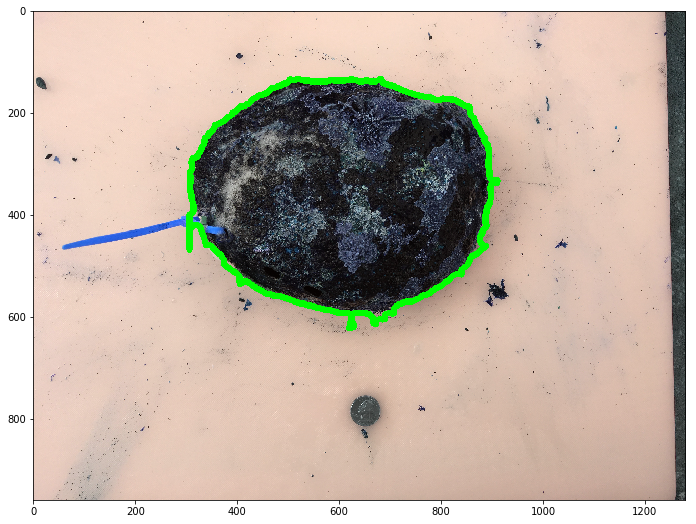

In [12]:
new_drawing = rescaled_image.copy()
contours, orig_contours = contour_utils.get_abalone_contour(new_drawing, small_abalone_template_contour)

cv2.drawContours(new_drawing, [contours], -1, (0,255,0),12)
#cv2.drawContours(new_drawing, np.array(orig_contours[1]), -1, (255,0,0),10)
plot.figure(figsize = (16,9))
plot.imshow(new_drawing)


first passs.....
num circle matches: 1


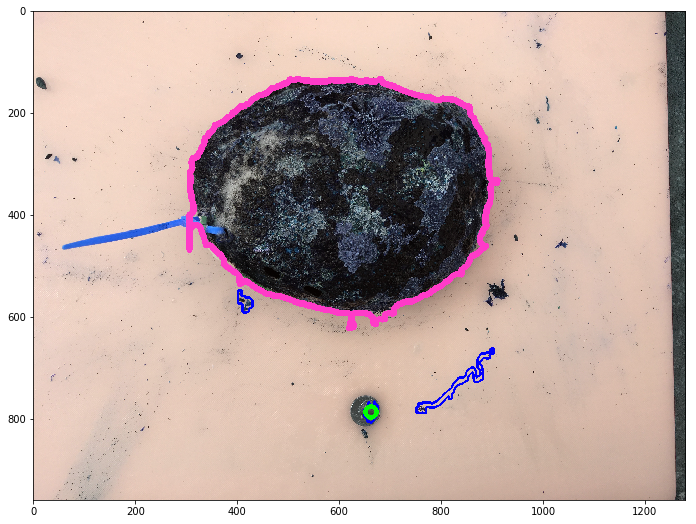

In [13]:
new_drawing = rescaled_image.copy()
scale_img, gray = contour_utils.get_quarter_image(new_drawing, False)
'''circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=100)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
# draw the outer circle
    cv2.circle(new_drawing,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(new_drawing,(i[0],i[1]),2,(0,0,255),3)
'''
abalone_contour = contours
cx,cy, radius, matches = contour_utils.get_quarter_dimensions(new_drawing, abalone_contour, quarter_template_contour, True)

#cv2.drawContours(new_drawing, thinned,-1, (0,255,0),13)
cv2.drawContours(new_drawing,[contours],-1,(255,59,200),12)
plot.figure(figsize = (16,9))
cv2.drawContours(new_drawing, matches, -1, (0,0,255), 4)
cv2.circle(new_drawing, (cx, cy), radius, (0,255,0),8)
plot.imshow(new_drawing)

In [ ]:
flipDrawing = orig_rows/orig_cols > 1.2
pixelsPerMetric, abaloneLength,left_point, right_point, left_ruler_point, right_ruler_point = drawing.draw_both_contours(rescaled_image, abalone_contour, True, flipDrawing, cx, cy, radius)

#pixelsPerMetric, abaloneLength, left_point, right_point = drawing.draw_contour(rescaled_image, 
#        target_contour, pixelsPerMetric, "Abalone", True, flipDrawing)
abaloneLength
